### **Chargement des images :**

**cv2.imread() (OpenCV) :** Pour charger les images à partir des fichiers.
**skimage.io.imread() (scikit-image) :** Alternative pour charger les images.

# Prétraitement des images :

**cv2.cvtColor() (OpenCV) :** Pour convertir les images en différents espaces de couleurs. \n
**cv2.resize() (OpenCV) :** Pour redimensionner les images.\n
**skimage.transform.resize() (scikit-image) :** Alternative pour redimensionner les images. \n
**skimage.color.rgb2gray() (scikit-image) :** Pour convertir les images en niveaux de gris. \n
**cv2.equalizeHist() (OpenCV) :** Pour égaliser l'histogramme des images. \n
**skimage.filters.gaussian() (scikit-image) :** Pour appliquer un flou gaussien. \n
**skimage.filters.sobel() (scikit-image) :** Pour détecter les contours. \n

# Extraction de caractéristiques :

**skimage.feature.hog() (scikit-image) :** Pour extraire les caractéristiques HOG (Histogram of Oriented Gradients).
**cv2.SIFT() (OpenCV) :** Pour extraire les caractéristiques SIFT (Scale-Invariant Feature Transform).
**cv2.ORB() (OpenCV) :** Pour extraire les caractéristiques ORB (Oriented FAST and Rotated BRIEF).

# Visualisation d'images :

**matplotlib.pyplot.imshow() (Matplotlib) :** Pour afficher les images.
**matplotlib.pyplot.subplot() (Matplotlib) :** Pour afficher plusieurs images dans une même figure.

# Augmentation de données :

**ImageDataGenerator (Keras) :** Pour augmenter les données en utilisant des transformations telles que la rotation, le zoom, le décalage, etc.
**Enregistrement des images :**

**cv2.imwrite() (OpenCV) :** Pour enregistrer les images traitées.

# Autres outils :

**os :** Pour effectuer des opérations sur les fichiers et les répertoires.
**glob :** Pour rechercher des fichiers correspondant à un motif spécifique.
**numpy :** Pour effectuer des opérations mathématiques sur les images.
**pandas :** Pour manipuler et analyser des données. ###


# Se mettre dans le dossier parent

In [1]:
import os
current_dir = %pwd
project_dir = os.path.dirname(current_dir)
%cd $project_dir

c:\Users\ayoub\OneDrive\Bureau\Datascientest_project\doc-classifier


C:\Users\ayoub\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# DATAFRAME CSV de données 

In [2]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns

# Construire le chemin complet du fichier CSV en utilisant os.path.join
csv_file_path = os.path.join(project_dir, 'data', 'raw', 'image_info.csv')
# Lire le fichier CSV en utilisant pd.read_csv
df = pd.read_csv(csv_file_path)

# Afficher les premières lignes du DataFrame pour vérification
print(df.head(5))

C:\Users\ayoub\AppData\Local\Temp\ipykernel_20836\2780678775.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


            filename extension colorspace  height  width    bluriness  \
0  image_0000000.tif       tif       gray    1000    767  1656.190694   
1  image_0000001.tif       tif       gray    1000    754  3841.701297   
2  image_0000002.tif       tif       gray    1000    771  2121.018741   
3  image_0000003.tif       tif       gray    1000    781  4507.434028   
4  image_0000004.tif       tif       gray    1000    783  3481.415517   

                                                path  dataset  
0  d:\DATA\a.asri\doc-classifier\data\raw\data_01...  data_01  
1  d:\DATA\a.asri\doc-classifier\data\raw\data_01...  data_01  
2  d:\DATA\a.asri\doc-classifier\data\raw\data_01...  data_01  
3  d:\DATA\a.asri\doc-classifier\data\raw\data_01...  data_01  
4  d:\DATA\a.asri\doc-classifier\data\raw\data_01...  data_01  


# Visualisation de la relation entre la hauteur et la largeur, regroupée par dataset

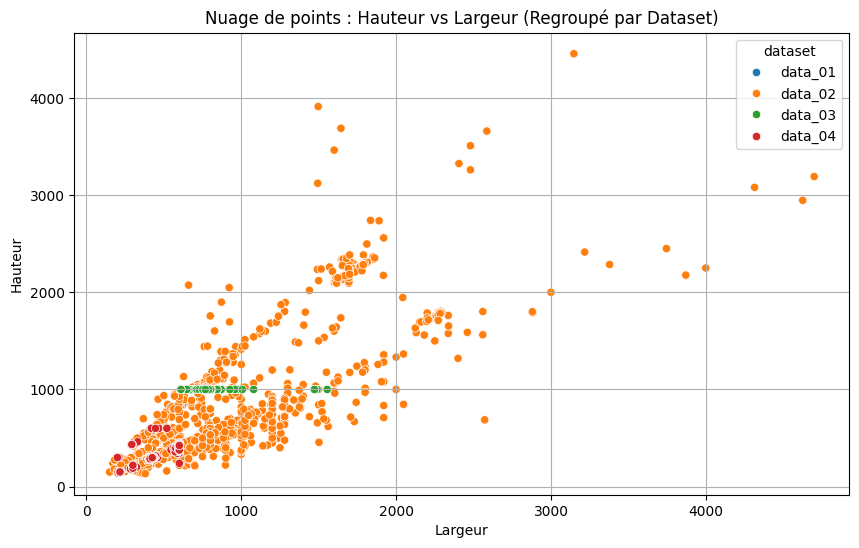

In [3]:

# Tracer un nuage de points en utilisant seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='width', y='height', hue='dataset', data=df)

# Ajouter des titres
plt.title('Nuage de points : Hauteur vs Largeur (Regroupé par Dataset)')
plt.xlabel('Largeur')
plt.ylabel('Hauteur')

# Afficher le graphique
plt.grid(True)
plt.show()


# La distribution des hauteurs et des largeurs par rappot à l'origine de la DATA

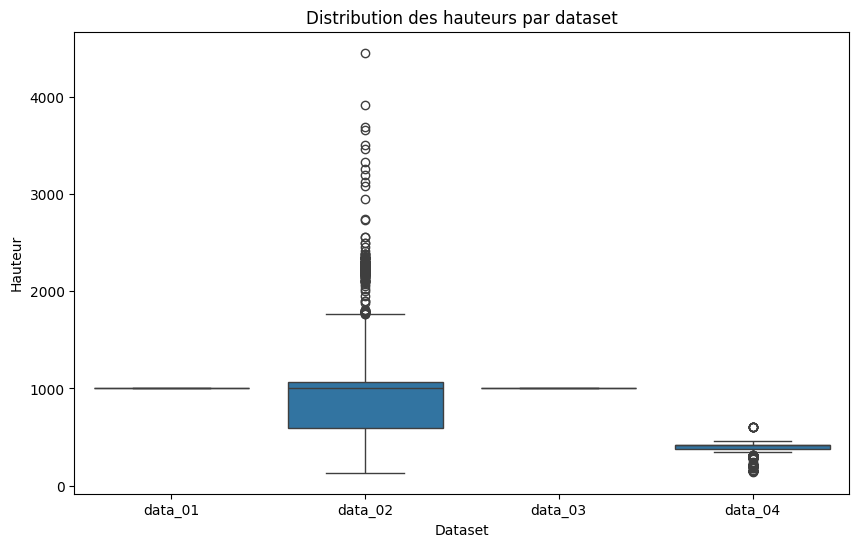

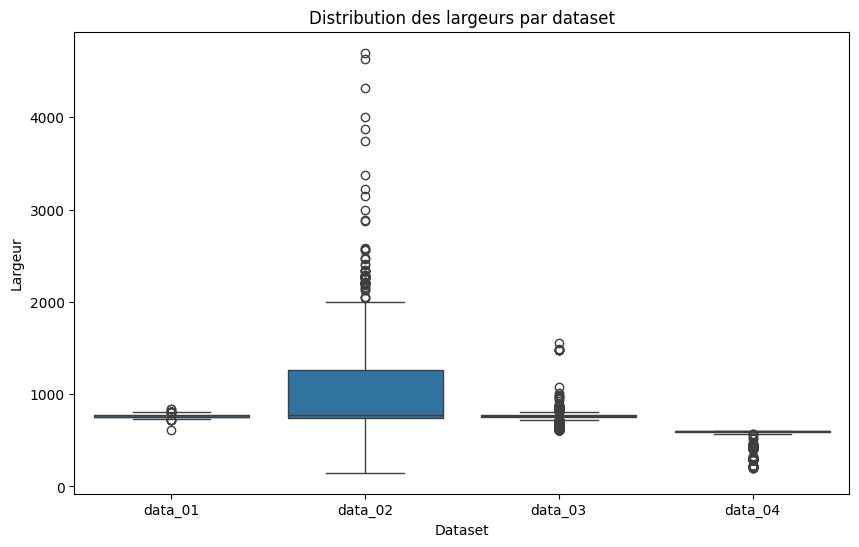

In [4]:

# Tracer la distribution des hauteurs par rapport à la colonne dataset
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='dataset', y='height')
plt.title('Distribution des hauteurs par dataset')
plt.xlabel('Dataset')
plt.ylabel('Hauteur')
plt.show()

# Tracer la distribution des largeurs par rapport à la colonne dataset
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='dataset', y='width')
plt.title('Distribution des largeurs par dataset')
plt.xlabel('Dataset')
plt.ylabel('Largeur')
plt.show()

# Fonction pour calculer l'histogramme de couleurs d'une image

In [6]:
import cv2
import matplotlib.pyplot as plt
import os

def compute_color_histogram(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    # Convertir l'image de BGR à RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Séparer les canaux de couleurs
    channels = cv2.split(image)
    # Calculer les histogrammes pour chaque canal de couleur
    histograms = [cv2.calcHist([channel], [0], None, [256], [0, 256]) for channel in channels]
    return histograms

# Affichage des histogrammes pour data_01, data_2, data_04

c:\Users\ayoub\OneDrive\Bureau\Datascientest_project\doc-classifier\data\raw\data_01\images
c:\Users\ayoub\OneDrive\Bureau\Datascientest_project\doc-classifier\data\raw\data_02\images
c:\Users\ayoub\OneDrive\Bureau\Datascientest_project\doc-classifier\data\raw\data_03\images
c:\Users\ayoub\OneDrive\Bureau\Datascientest_project\doc-classifier\data\raw\data_04\images


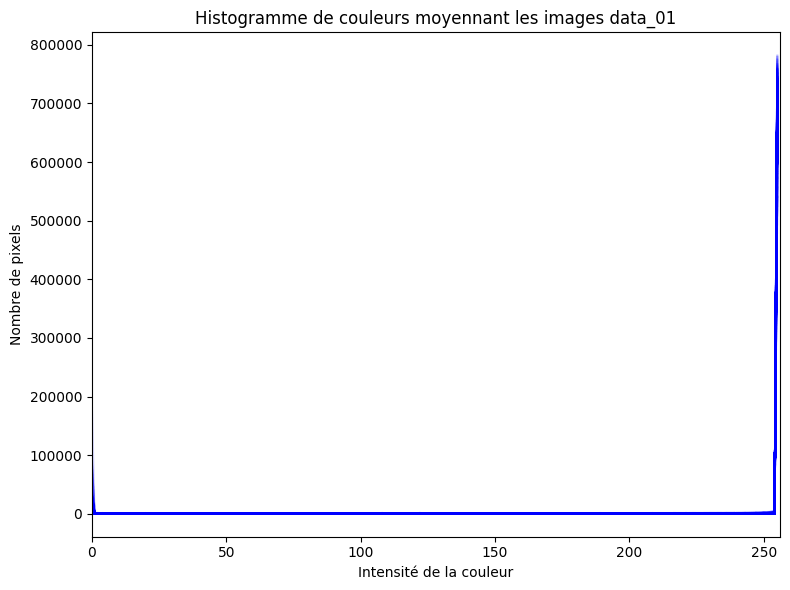

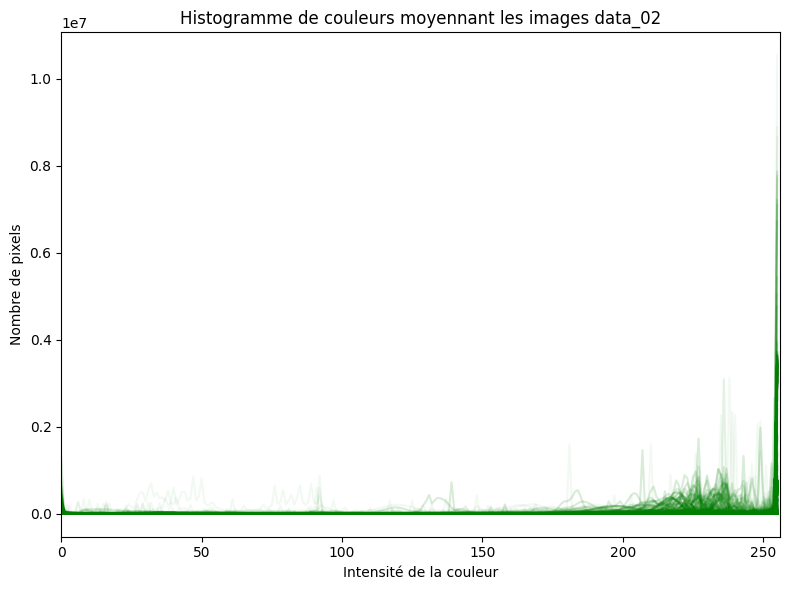

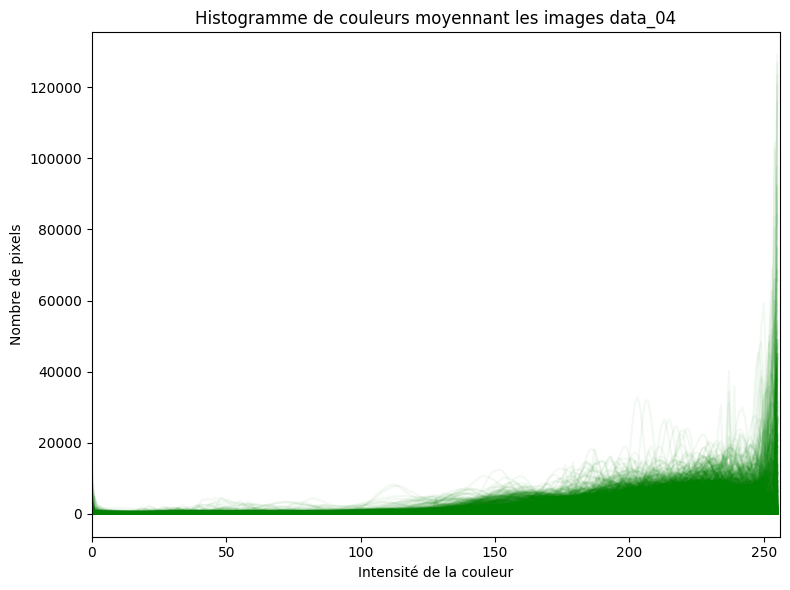

In [7]:
base_path = os.path.join(project_dir, 'data', 'raw')


# Initialiser une liste pour chaque ensemble d'histogrammes
histograms_data_01 = []
histograms_data_02 = []
histograms_data_03 = []
histograms_data_04 = []

# Chemin de base pour les images
base_path = os.path.join(project_dir, 'data', 'raw')

# Itérer sur les dossiers de données de 01 à 04
for i in range(1, 5):
    folder_name = f"data_0{i}"
    images_path = os.path.join(base_path, folder_name, 'images')
    print(images_path)  
    histograms_data = []  # Initialiser une liste pour stocker les histogrammes de cet ensemble d'images
    for image_file in os.listdir(images_path):
        image_path = os.path.join(images_path, image_file)
        histogram = compute_color_histogram(image_path)
        histograms_data.extend(histogram)  # Ajouter les histogrammes de cette image à la liste
    # Stocker les histogrammes dans la liste correspondante
    if i == 1:
        histograms_data_01 = histograms_data
    elif i == 2:
        histograms_data_02 = histograms_data
    elif i == 3:
        histograms_data_03 = histograms_data
    elif i == 4:
        histograms_data_04 = histograms_data

# Afficher les histogrammes moyennants les images data_01
plt.figure(figsize=(8, 6))
plt.title("Histogramme de couleurs moyennant les images data_01")
plt.xlabel("Intensité de la couleur")
plt.ylabel("Nombre de pixels")
for histogram in histograms_data_01:
    plt.plot(histogram, color='blue', alpha=0.05)
plt.xlim([0, 256])
plt.tight_layout()
plt.show()

# Afficher les histogrammes moyennants les images data_02
plt.figure(figsize=(8, 6))
plt.title("Histogramme de couleurs moyennant les images data_02")
plt.xlabel("Intensité de la couleur")
plt.ylabel("Nombre de pixels")
for histogram in histograms_data_02:
    plt.plot(histogram, color='green', alpha=0.05)
plt.xlim([0, 256])
plt.tight_layout()
plt.show()

# Afficher les histogrammes moyennants les images data_04
plt.figure(figsize=(8, 6))
plt.title("Histogramme de couleurs moyennant les images data_04")
plt.xlabel("Intensité de la couleur")
plt.ylabel("Nombre de pixels")
for histogram in histograms_data_04:
    plt.plot(histogram, color='green', alpha=0.05)
plt.xlim([0, 256])
plt.tight_layout()
plt.show()






# Distibution de flou dans la base de données

C:\Users\ayoub\AppData\Local\Temp\ipykernel_20836\1361716666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dataset', y='bluriness', data=df, palette='Set3')


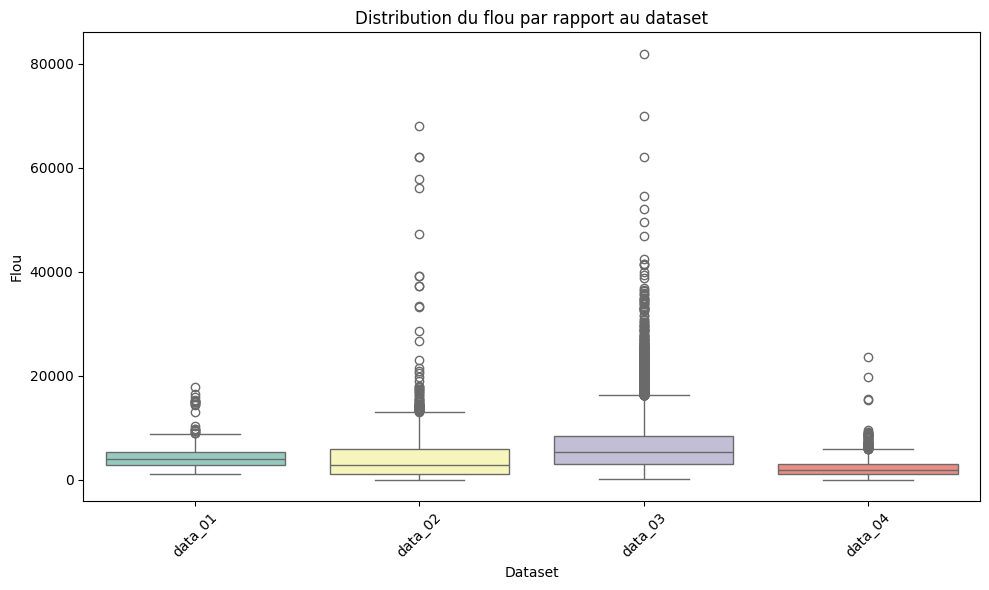

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='dataset', y='bluriness', data=df, palette='Set3')
plt.title('Distribution du flou par rapport au dataset')
plt.xlabel('Dataset')
plt.ylabel('Flou')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graphique nombre d'image par catégorie

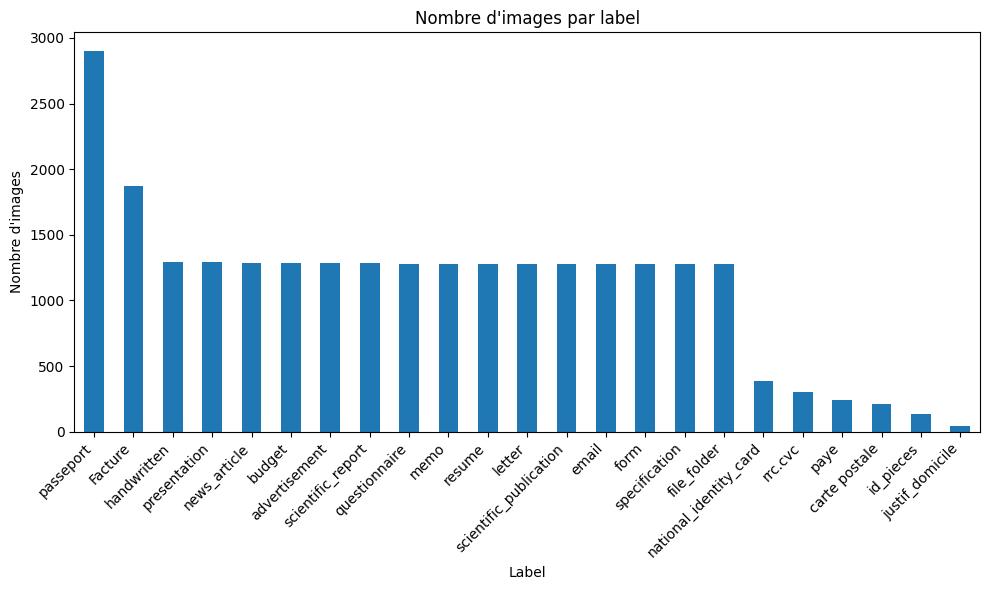

In [18]:
counts = Labels['Label'].value_counts()

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Nombre d\'images par label')
plt.xlabel('Label')
plt.ylabel('Nombre d\'images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# Construire le chemin complet du fichier CSV en utilisant os.path.join
csv_file_path = os.path.join(project_dir, 'data', 'raw', 'Labels.csv')
# Lire le fichier CSV en utilisant pd.read_csv
Labels = pd.read_csv(csv_file_path)

Labels

,Name,Label
0,image_0000000.tif,Facture
1,image_0000001.tif,Facture
2,image_0000002.tif,Facture
3,image_0000003.tif,Facture
4,image_0000004.tif,Facture
...,...,...
25301,image_0001586.jpg,national_identity_card
25302,image_0001587.jpg,national_identity_card
25303,image_0001587.jpg,national_identity_card
25304,image_0001588.jpg,national_identity_card


# Disribution des pixels par image par catégorie pour chaque dataset

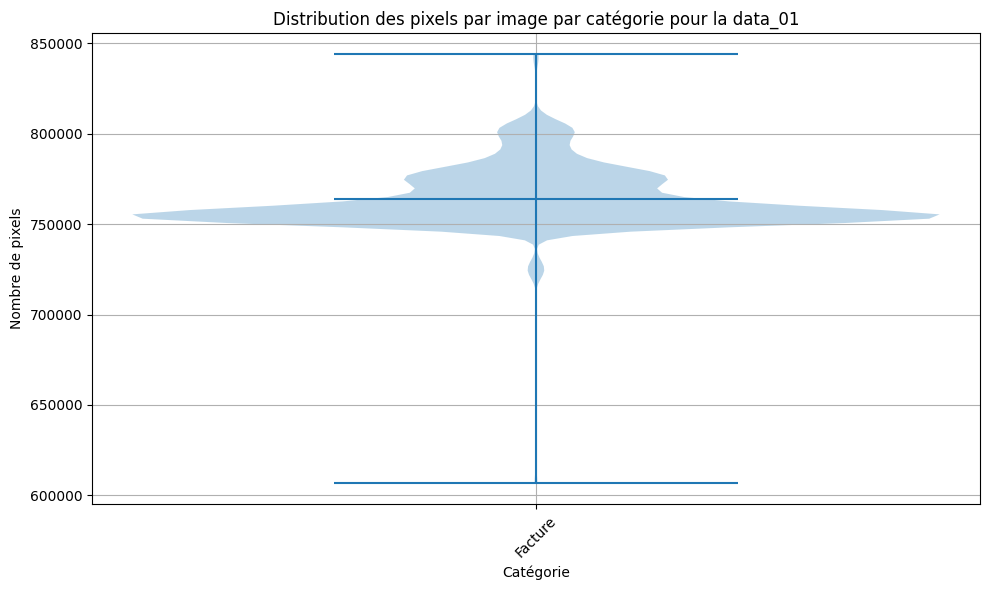

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# Lire le fichier CSV
csv_file_path = "data/raw/data_01/categories01.csv"
data = pd.read_csv(csv_file_path)

# Chemin vers le répertoire contenant les images
images_dir = "data/raw/data_01/images"

# Initialiser un dictionnaire pour stocker les dimensions des images par catégorie
category_dimensions = {}

# Parcourir chaque ligne du DataFrame
for index, row in data.iterrows():
    image_filename = row['filenames']
    category = row['category']
    
    # Chemin complet vers l'image
    image_path = os.path.join(images_dir, image_filename)
    
    # Lire l'image
    image = cv2.imread(image_path)
    
    # Obtenez les dimensions de l'image
    height, width, _ = image.shape
    
    # Calculez le nombre total de pixels dans l'image
    total_pixels = height * width
    
    # Ajouter les dimensions de l'image à la catégorie correspondante dans le dictionnaire
    if category in category_dimensions:
        category_dimensions[category].append(total_pixels)
    else:
        category_dimensions[category] = [total_pixels]

# Créer une liste de listes pour les données de violon
data_violin = [category_dimensions[category] for category in category_dimensions.keys()]

# Créer un graphique en violon
plt.figure(figsize=(10, 6))
plt.violinplot(data_violin, showmeans=True)
plt.xticks(range(1, len(category_dimensions.keys()) + 1), category_dimensions.keys(), rotation=45)
plt.xlabel('Catégorie')
plt.ylabel('Nombre de pixels')
plt.title('Distribution des pixels par image par catégorie pour la data_01')
plt.grid(True)
plt.tight_layout()
plt.show()


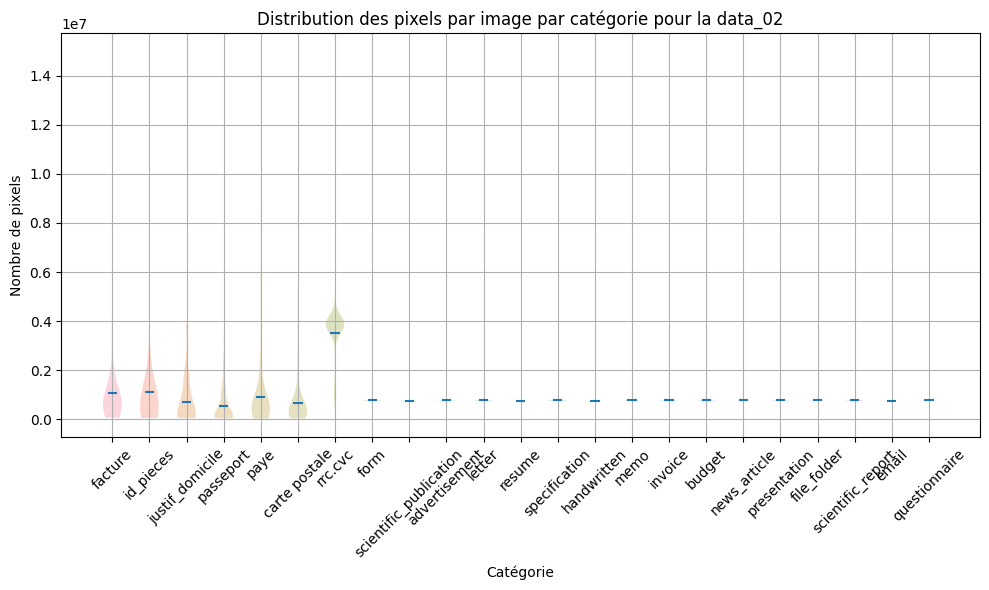

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# Lire le fichier CSV
csv_file_path = "data/raw/data_02/other_data.csv"
data = pd.read_csv(csv_file_path)

# Chemin vers le répertoire contenant les images
images_dir = "data/raw/data_02/images"

# Initialiser un dictionnaire pour stocker les dimensions des images par catégorie
category_dimensions = {}

# Parcourir chaque ligne du DataFrame
for index, row in data.iterrows():
    image_filename = row['filename']
    category = row['type']
    
    # Chemin complet vers l'image
    image_path = os.path.join(images_dir, image_filename)
    
    # Lire l'image
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    
    # Obtenez les dimensions de l'image
    height, width, _ = image.shape
    
    # Calculez le nombre total de pixels dans l'image
    total_pixels = height * width
    
    # Ajouter les dimensions de l'image à la catégorie correspondante dans le dictionnaire
    if category in category_dimensions:
        category_dimensions[category].append(total_pixels)
    else:
        category_dimensions[category] = [total_pixels]

# Définir une palette de couleurs pour chaque catégorie
category_colors = sns.color_palette("husl", len(category_dimensions))

# Créer une liste de listes pour les données de violon
data_violin = [category_dimensions[category] for category in category_dimensions.keys()]

# Créer un graphique en violon avec les couleurs définies
plt.figure(figsize=(10, 6))
violins = plt.violinplot(data_violin, showmeans=True, showextrema=False)

# Modifier la couleur de chaque violon
for i, pc in enumerate(violins['bodies']):
    pc.set_facecolor(category_colors[i])

plt.xticks(range(1, len(category_dimensions.keys()) + 1), category_dimensions.keys(), rotation=45)
plt.xlabel('Catégorie')
plt.ylabel('Nombre de pixels')
plt.title('Distribution des pixels par image par catégorie pour la data_02')
plt.grid(True)
plt.tight_layout()
plt.show()


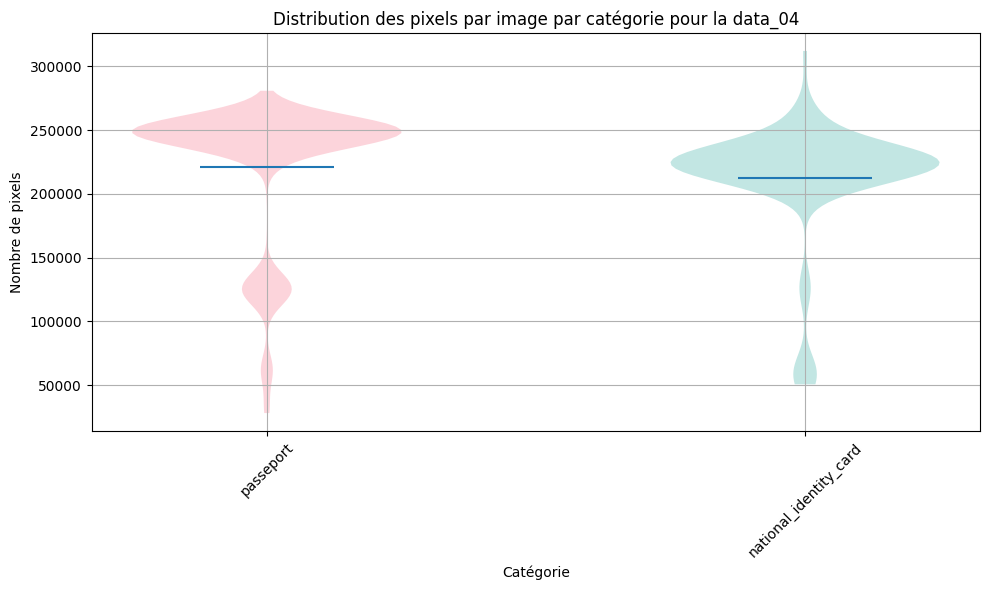

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# Lire le fichier CSV
csv_file_path = "data/raw/data_04/categories.csv"
data = pd.read_csv(csv_file_path)

# Chemin vers le répertoire contenant les images
images_dir = "data/raw/data_04/images"

# Initialiser un dictionnaire pour stocker les dimensions des images par catégorie
category_dimensions = {}

# Parcourir chaque ligne du DataFrame
for index, row in data.iterrows():
    image_filename = row['image_name']
    category = row['category']
    
    # Chemin complet vers l'image
    image_path = os.path.join(images_dir, image_filename)
    
    # Lire l'image
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    
    # Obtenez les dimensions de l'image
    height, width, _ = image.shape
    
    # Calculez le nombre total de pixels dans l'image
    total_pixels = height * width
    
    # Ajouter les dimensions de l'image à la catégorie correspondante dans le dictionnaire
    if category in category_dimensions:
        category_dimensions[category].append(total_pixels)
    else:
        category_dimensions[category] = [total_pixels]

# Définir une palette de couleurs pour chaque catégorie
category_colors = sns.color_palette("husl", len(category_dimensions))

# Créer une liste de listes pour les données de violon
data_violin = [category_dimensions[category] for category in category_dimensions.keys()]

# Créer un graphique en violon avec les couleurs définies
plt.figure(figsize=(10, 6))
violins = plt.violinplot(data_violin, showmeans=True, showextrema=False)

# Modifier la couleur de chaque violon
for i, pc in enumerate(violins['bodies']):
    pc.set_facecolor(category_colors[i])

plt.xticks(range(1, len(category_dimensions.keys()) + 1), category_dimensions.keys(), rotation=45)
plt.xlabel('Catégorie')
plt.ylabel('Nombre de pixels')
plt.title('Distribution des pixels par image par catégorie pour la data_04')
plt.grid(True)
plt.tight_layout()
plt.show()
